<a href="https://colab.research.google.com/github/Yasmiiiiine/12-Month-Forecast-With-LSTM/blob/master/Niveau_0_Clustering_Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


# **Autoencoder**

**Encoder**


In [0]:
encoder_input = Input((784,))
encoder_output = Dense(256, activation="relu")(encoder_input)
encoder_output = Dense(128, activation="relu")(encoder_output)
encoder_output = Dense(64, activation="relu")(encoder_output)
encoder_output = Dense(32, activation="relu")(encoder_output)
encoder_output = Dense(2, activation="relu")(encoder_output)
# tanh , sigmoid
encoder = Model([encoder_input], [encoder_output])

**Decoder**

In [0]:
decoder_input = Input((2,))
decoder_output = Dense(32, activation="relu")(decoder_input)
decoder_output = Dense(64, activation="relu")(decoder_output)
decoder_output = Dense(128, activation="relu")(decoder_output)
decoder_output = Dense(256, activation="relu")(decoder_output)
decoder_output = Dense(784, activation="sigmoid")(decoder_output)

decoder = Model([decoder_input], [decoder_output])

**Full model**

In [0]:
autoencoder_input = Input((784,))
autoencoder_output = decoder(encoder(autoencoder_input))
autoencoder = Model([autoencoder_input], [autoencoder_output])

In [7]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
model_1 (Model)              (None, 2)                 244258    
_________________________________________________________________
model_2 (Model)              (None, 784)               245040    
Total params: 489,298
Trainable params: 489,298
Non-trainable params: 0
_________________________________________________________________


**Train**

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 4s 69us/step - loss: 0.2838 - val_loss: 0.2492
Epoch 2/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.2470 - val_loss: 0.2365
Epoch 3/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.2169 - val_loss: 0.2063
Epoch 4/200
60000/60000 [==============================] - 2s 39us/step - loss: 0.2013 - val_loss: 0.1956
Epoch 5/200
60000/60000 [==============================] - 2s 39us/step - loss: 0.1920 - val_loss: 0.1888
Epoch 6/200
60000/60000 [==============================] - 2s 39us/step - loss: 0.1871 - val_loss: 0.1854
Epoch 7/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.1844 - val_loss: 0.1838
Epoch 8/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.1826 - val_loss: 0.1822
Epoch 9/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.1815 - val_loss: 0.1

**Visualisation**

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [10]:
encoded_imgs.shape

(10000, 2)

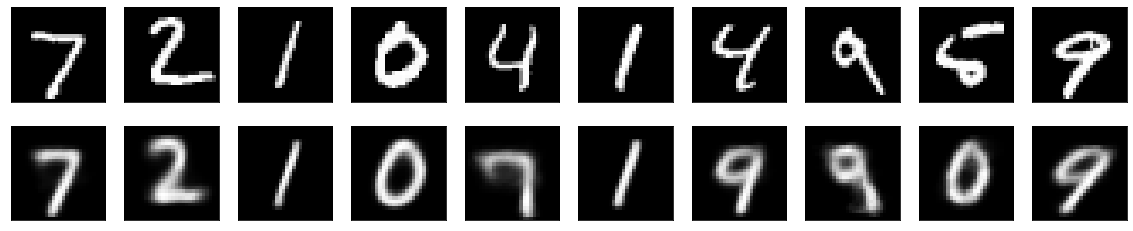

In [11]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Latent space**

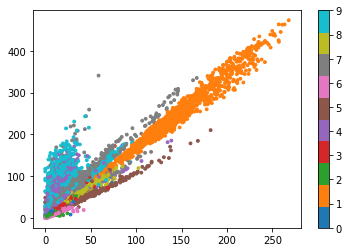

In [12]:
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1], c=y_test, s=8, cmap='tab10')
plt.colorbar()
plt.show() 


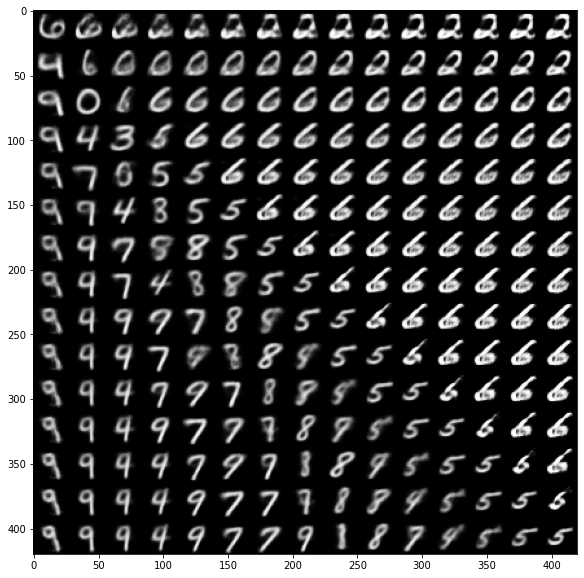

In [13]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28

z1 = np.linspace(0, 100, n)
z2 = np.linspace(0, 100, n)
z_grid = np.dstack(np.meshgrid(z1, z2))

x_pred_grid = decoder.predict(z_grid.reshape(n*n, 2)) \
                     .reshape(n, n, digit_size, digit_size)

plt.figure(figsize=(10, 10))
plt.imshow(np.block(list(map(list, x_pred_grid))), cmap='gray')
plt.show()

# **Convolutional Autoencoder**

**Conv Encoder**


In [0]:
conv_encoder_input = Input(shape=(28, 28, 1))
conv_encoder_output = Conv2D(16, (3, 3), activation='relu', padding='same')(conv_encoder_input)
conv_encoder_output = MaxPooling2D((2, 2), padding='same')(conv_encoder_output)
conv_encoder_output = Conv2D(8, (3, 3), activation='relu', padding='same')(conv_encoder_output)
conv_encoder_output = MaxPooling2D((2, 2), padding='same')(conv_encoder_output)
conv_encoder_output = Conv2D(4, (3, 3), activation='relu', padding='same')(conv_encoder_output)
conv_encoder_output = MaxPooling2D((2, 2), padding='same')(conv_encoder_output)
conv_encoder_output = Conv2D(2, (3, 3), activation='relu', padding='same')(conv_encoder_output)
conv_encoder_output = MaxPooling2D((2, 2), padding='same')(conv_encoder_output)
# flatten , dense 2
conv_encoder_output = Flatten()(conv_encoder_output)
conv_encoder = Dense(2, activation="sigmoid")(conv_encoder_output)

**Conv Decoder**

In [0]:
# dense 4, reshape
conv_decoder_output = Dense(8, activation="relu")(conv_encoder)
conv_decoder_output = Reshape((2,2,2))(conv_decoder_output)
conv_decoder_output = Conv2D(2, (3, 3), activation='relu', padding='same')(conv_decoder_output)
conv_decoder_output = UpSampling2D((2, 2))(conv_decoder_output)
conv_decoder_output = Conv2D(4, (3, 3), activation='relu', padding='same')(conv_decoder_output)
conv_decoder_output = UpSampling2D((2, 2))(conv_decoder_output)
conv_decoder_output = Conv2D(8, (3, 3), activation='relu', padding='same')(conv_decoder_output)
conv_decoder_output = UpSampling2D((2, 2))(conv_decoder_output)
conv_decoder_output = Conv2D(16, (3, 3), activation='relu')(conv_decoder_output)
conv_decoder_output = UpSampling2D((2, 2))(conv_decoder_output)
conv_decoder = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv_decoder_output)

**Conv Autoencoder**

In [0]:
conv_autoencoder = Model(conv_encoder_input, conv_decoder)

In [24]:
conv_autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 4)           292       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 4)           0   

**Train**

In [0]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

In [27]:
conv_autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.3482 - val_loss: 0.2498
Epoch 2/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.2459 - val_loss: 0.2424
Epoch 3/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.2389 - val_loss: 0.2348
Epoch 4/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.2329 - val_loss: 0.2308
Epoch 5/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.2296 - val_loss: 0.2284
Epoch 6/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.2263 - val_loss: 0.2247
Epoch 7/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.2236 - val_loss: 0.2224
Epoch 8/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.2218 - val_loss: 0.2210
Epoch 9/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.2206 - val_loss: 0.2

**Visualisation**

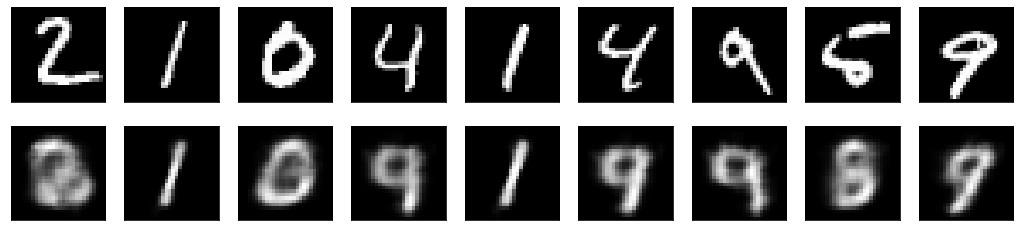

In [28]:
conv_encoder_model = Model(conv_encoder_input, conv_encoder)
encoded_imgs = conv_encoder_model.predict(x_test)
decoded_imgs = conv_autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Latent space for conv AE**

In [29]:
encoded_imgs.shape

(10000, 2)

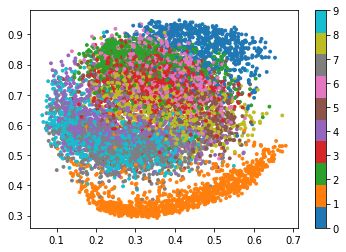

In [30]:
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1], c=y_test, s=8, cmap='tab10')
plt.colorbar()
plt.show() 

In [34]:
x_test[0].shape

(28, 28, 1)

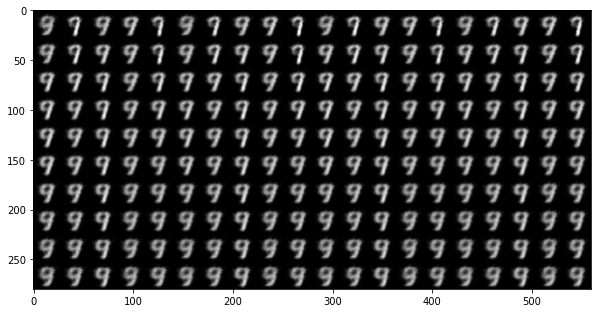

In [68]:
# display a 2D manifold of the digits
digit_size = 28

z1 = np.linspace(0.1, 0.6, 280)
z2 = np.linspace(0.3, 0.9, 280)
z_grid = np.dstack(np.meshgrid(z1, z2))

x_pred_grid = conv_autoencoder.predict(z_grid.reshape(200, 28, 28, 1)).reshape(10, 20, digit_size, digit_size)

plt.figure(figsize=(10, 10))
plt.imshow(np.block(list(map(list, x_pred_grid))), cmap='gray')
plt.show()

# **Images avec du bruit**

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

**Noise AE**

In [0]:
n_autoencoder = Model(conv_encoder_input, conv_decoder)
n_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**Train**


In [71]:
n_autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.2304 - val_loss: 0.2225
Epoch 2/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.2208 - val_loss: 0.2201
Epoch 3/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.2190 - val_loss: 0.2187
Epoch 4/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.2179 - val_loss: 0.2172
Epoch 5/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.2172 - val_loss: 0.2170
Epoch 6/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.2167 - val_loss: 0.2167
Epoch 7/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.2165 - val_loss: 0.2161
Epoch 8/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.2159 - val_loss: 0.2156
Epoch 9/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.2156 - val_loss: 0.2

**Visualisation**

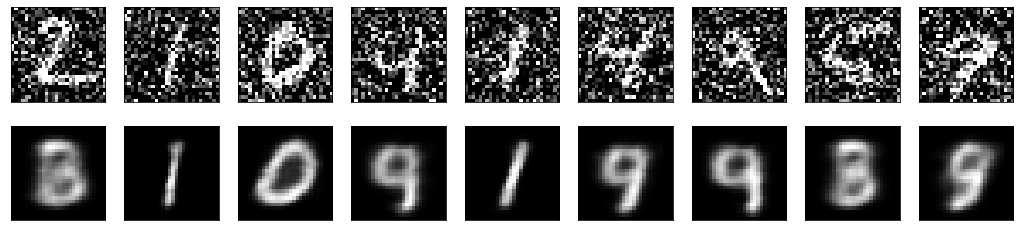

In [72]:
# conv_encoder_model = Model(conv_encoder_input, conv_encoder)
encoded_imgs = conv_encoder_model.predict(x_test_noisy)
decoded_imgs = n_autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Latent space for noise AE**

In [73]:
encoded_imgs.shape

(10000, 2)

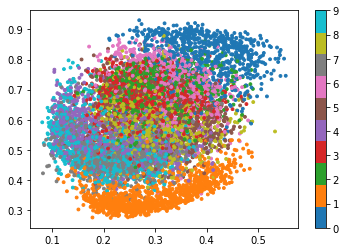

In [74]:
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1], c=y_test, s=8, cmap='tab10')
plt.colorbar()
plt.show() 

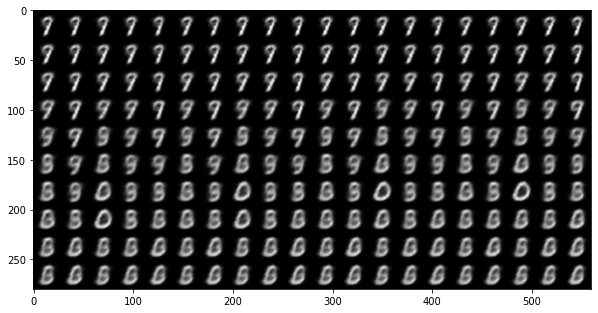

In [76]:
# display a 2D manifold of the digits
digit_size = 28

z1 = np.linspace(0.1, 0.4, 280)
z2 = np.linspace(0.3, 0.9, 280)
z_grid = np.dstack(np.meshgrid(z1, z2))

x_pred_grid = conv_autoencoder.predict(z_grid.reshape(200, 28, 28, 1)).reshape(10, 20, digit_size, digit_size)

plt.figure(figsize=(10, 10))
plt.imshow(np.block(list(map(list, x_pred_grid))), cmap='gray')
plt.show()